Кейс 10. Методы кластеризации.

Вопросы для подготовки к лабораторной работе:
1.	Что такое «кластеризация»? Чем кластеризация отличается от классификации?
2.	Какие задачи решаются с использованием методов кластеризации?
3.	Перечислите известные Вам методы кластеризации.
4.	В чем заключатся суть метода k-средних?
5.  В чем принципиальное отличие метода DBSCAN от k-средних?
5.  Чем метод HDBSCAN отличается от DBSCAN?

1. Создайте синтетический набор данных.

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных с использованием функции make_blobs
# Два кластера с центрами (-0.75, 2.25) и (1.0, 2.0), стандартное отклонение 0.25
X1, labels1_true = make_blobs(n_samples=100, centers=[(- 0.75, 2.25), (1.0, 2.0)], cluster_std=0.25)

# Генерация данных с использованием функции make_moons
# Полумесяцы с шумом 0.05
X2, labels2_true = make_moons(n_samples=150, noise=0.05)

# Объединение двух наборов данных в один массив
data = np.vstack([X1, X2])

# Стандартизация данных (приводим к среднему значению 0 и стандартному отклонению 1)
data = StandardScaler().fit_transform(data)

# Изменение меток классов для данных make_moons
# Меняем метки: 0 -> 2, 1 -> 3
labels2_true[labels2_true == 0] = 2
labels2_true[labels2_true == 1] = 3

# Объединение меток из двух наборов данных в один массив меток
labels_true=np.concatenate((labels1_true, labels2_true))

2. Выполните визуализацию полученных данных.

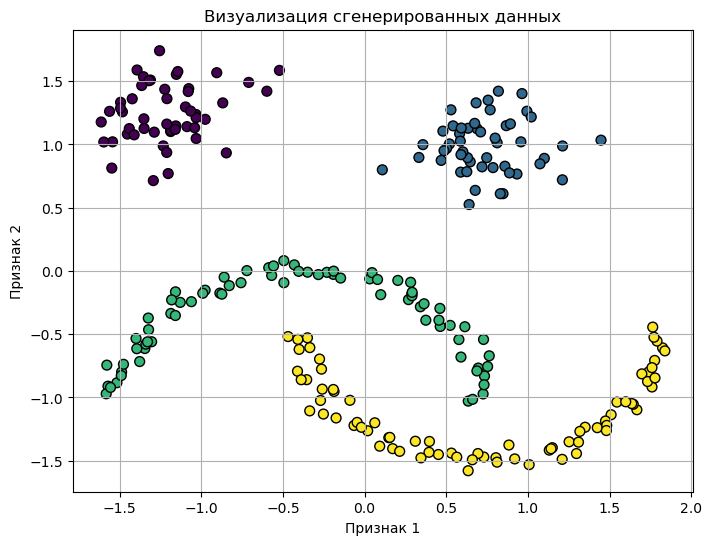

In [3]:
# Визуализация данных
plt.figure(figsize=(8, 6))

# Отображение данных с метками
plt.scatter(data[:, 0], data[:, 1], c=labels_true, cmap='viridis', s=50, edgecolor='k')

# Настройка осей и заголовка
plt.title("Визуализация сгенерированных данных")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.grid(True)

# Показать график
plt.show()

3. Примените к данным алгоритм DBSCAN. Получите доступ к сформированным меткам кластеров, используя атрибут labels_. Шум отмечается меткой -1. Выведите количество выделенных кластеров и предполагаемое число точек шума.

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
dbscan.fit(data)

# Получение меток кластеров
labels_dbscan = dbscan.labels_

# Количество выделенных кластеров (кластеры не считаются как -1)
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

# Количество точек, помеченных как шум (метки -1)
n_noise = list(labels_dbscan).count(-1)

print(f'Количество кластеров: {n_clusters}')
print(f'Количество точек шума: {n_noise}')

Количество кластеров: 3
Количество точек шума: 0


Алгоритмы кластеризации - это неконтролируемые методы обучения. Однако, поскольку make_blobs предоставляет доступ к истинным меткам синтетических кластеров, можно использовать оценочные метрики, которые используют эту “контролируемую” информацию о достоверности данных для количественной оценки качества результирующих кластеров. Примерами таких показателей являются однородность, полнота, V-мера, Rand-индекс, коэффициент силуэта и др. Однородность и полнота могут меняться в пределах от 0 до 1. Однородность равна единице, если каждый кластер содержит только членов одного класса. Полнота равна единице, если все объекты класса всегда оказываются в одном кластере. Гармоническое среднее однородности и полноты называется V-мерой. Rand-индекс имеет область определения от 0 до 1, где 1 — полное совпадение кластеров с заданными классами, а 0 — отсутствие совпадений. Коэффициент силуэта принимает значения от –1 до +1 и максимизируется, когда кластеры кучные и хорошо отделены друг от друга. Подробнее об оценочных метриках можно прочитать по ссылке: https://academy.yandex.ru/handbook/ml/article/klasterizaciya

4. Импортируем модуль метрик из библиотеки Sklearn. Рассчитайте оценочные метрики: однородность, полноту, V-меру, Rand-индекс, коэффициент силуэта.

In [6]:
from sklearn import metrics

homogeneity = metrics.homogeneity_score(labels_true, labels_dbscan)
completeness = metrics.completeness_score(labels_true, labels_dbscan)
v_measure = metrics.v_measure_score(labels_true, labels_dbscan)
adjusted_rand = metrics.adjusted_rand_score(labels_true, labels_dbscan)
silhouette = metrics.silhouette_score(data, labels_dbscan)

# Однородность — показывает, насколько все элементы внутри одного кластера относятся к одному классу.
print(f'Однородность: {homogeneity:.2f}')
# Полнота — измеряет, охвачены ли все элементы одного класса внутри одного кластера.
print(f'Полнота: {completeness:.2f}')
# V-мера — гармоническое среднее между однородностью и полнотой.
print(f'V-мера: {v_measure:.2f}')
# Rand-индекс — мера схожести кластеров с эталонной классификацией.
print(f'Rand-индекс: {adjusted_rand:.2f}')
# Коэффициент силуэта — показатель того, насколько хорошо элементы распределены по кластерам (ближе к 1 — лучшее распределение).
print(f'Коэффициент силуэта: {silhouette:.2f}')

Однородность: 0.70
Полнота: 1.00
V-мера: 0.82
Rand-индекс: 0.62
Коэффициент силуэта: 0.48


5. Выполните визуализацию решения.

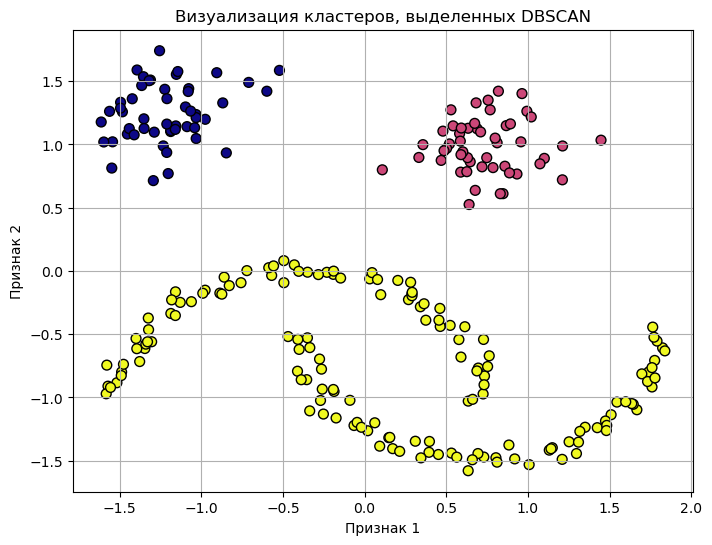

In [7]:
plt.figure(figsize=(8, 6))

plt.scatter(data[:, 0], data[:, 1], c=labels_dbscan, cmap='plasma', s=50, edgecolor='k')

plt.title("Визуализация кластеров, выделенных DBSCAN")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.grid(True)

plt.show()

5. Установите библиотеку hdbscan.

6. Выполните кластеризацию синтетических данных методом HDBSCAN.

In [11]:
import hdbscan

hdbscan = hdbscan.HDBSCAN()
labels_hdbscan = hdbscan.fit_predict(data)


n_hdbscan_clusters = len(set(labels_hdbscan)) - (1 if -1 in labels_hdbscan else 0)
n_hdbscan_noise = list(labels_hdbscan).count(-1)

print(f'Количество кластеров: {n_hdbscan_clusters}')
print(f'Количество точек шума: {n_hdbscan_noise}')

Количество кластеров: 4
Количество точек шума: 0


7. Рассчитайте оценочные метрики.

In [21]:

homogeneity = metrics.homogeneity_score(labels_true, labels_hdbscan)
completeness = metrics.completeness_score(labels_true, labels_hdbscan)
v_measure = metrics.v_measure_score(labels_true, labels_hdbscan)
adjusted_rand = metrics.adjusted_rand_score(labels_true, labels_hdbscan)
silhouette = metrics.silhouette_score(data, labels_hdbscan)

# Однородность — показывает, насколько все элементы внутри одного кластера относятся к одному классу.
print(f'Однородность: {homogeneity:.2f}')
# Полнота — измеряет, охвачены ли все элементы одного класса внутри одного кластера.
print(f'Полнота: {completeness:.2f}')
# V-мера — гармоническое среднее между однородностью и полнотой.
print(f'V-мера: {v_measure:.2f}')
# Rand-индекс — мера схожести кластеров с эталонной классификацией.
print(f'Rand-индекс: {adjusted_rand:.2f}')
# Коэффициент силуэта — показатель того, насколько хорошо элементы распределены по кластерам (ближе к 1 — лучшее распределение).
print(f'Коэффициент силуэта: {silhouette:.2f}')

Однородность: 1.00
Полнота: 1.00
V-мера: 1.00
Rand-индекс: 1.00
Коэффициент силуэта: 0.47


8. Выполните визуализацию решения.

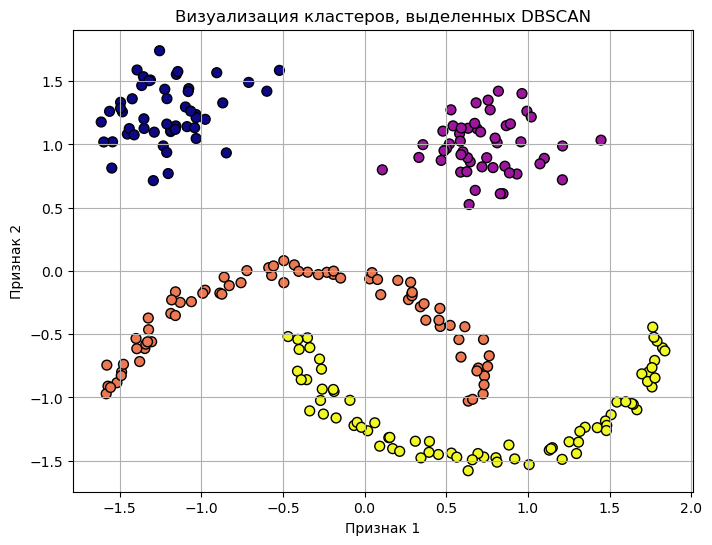

In [13]:
plt.figure(figsize=(8, 6))

plt.scatter(data[:, 0], data[:, 1], c=labels_hdbscan, cmap='plasma', s=50, edgecolor='k')

plt.title("Визуализация кластеров, выделенных DBSCAN")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.grid(True)

plt.show()

9. Выполните кластеризацию синтетических данных методом k-средних.

In [18]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=4, n_init='auto')
labels_kmeans = kmeans.fit_predict(data)

# Выводим количество кластеров (k-средних всегда возвращает заданное число кластеров)
n_kmeans_clusters = len(set(labels_kmeans)) - (1 if -1 in labels_kmeans else 0)
n_kmeans_noise = list(labels_kmeans).count(-1)

print(f'Количество кластеров: {n_kmeans_clusters}')
print(f'Количество точек шума: {n_kmeans_noise}')

Количество кластеров: 4
Количество точек шума: 0


10. Рассчитайте оценочные метрики.

In [19]:
homogeneity = metrics.homogeneity_score(labels_true, labels_kmeans)
completeness = metrics.completeness_score(labels_true, labels_kmeans)
v_measure = metrics.v_measure_score(labels_true, labels_kmeans)
adjusted_rand = metrics.adjusted_rand_score(labels_true, labels_kmeans)
silhouette = metrics.silhouette_score(data, labels_kmeans)

# Однородность — показывает, насколько все элементы внутри одного кластера относятся к одному классу.
print(f'Однородность: {homogeneity:.2f}')
# Полнота — измеряет, охвачены ли все элементы одного класса внутри одного кластера.
print(f'Полнота: {completeness:.2f}')
# V-мера — гармоническое среднее между однородностью и полнотой.
print(f'V-мера: {v_measure:.2f}')
# Rand-индекс — мера схожести кластеров с эталонной классификацией.
print(f'Rand-индекс: {adjusted_rand:.2f}')
# Коэффициент силуэта — показатель того, насколько хорошо элементы распределены по кластерам (ближе к 1 — лучшее распределение).
print(f'Коэффициент силуэта: {silhouette:.2f}')

Однородность: 0.75
Полнота: 0.75
V-мера: 0.75
Rand-индекс: 0.63
Коэффициент силуэта: 0.57


11. Выполните визуализацию решения.

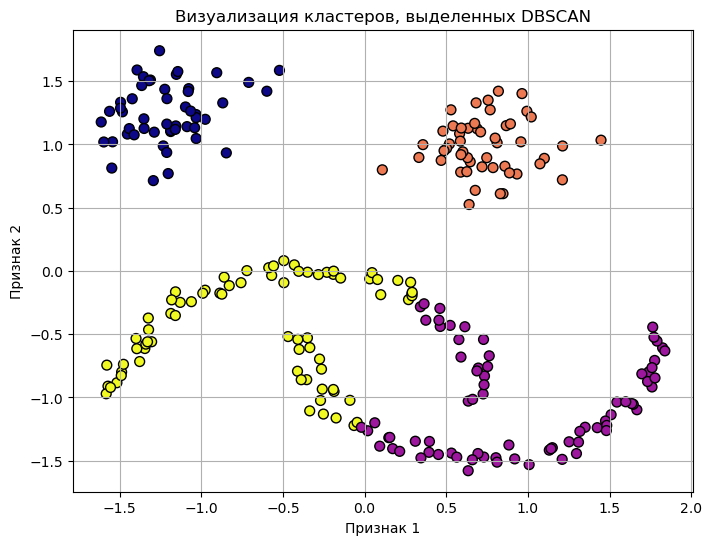

In [20]:
plt.figure(figsize=(8, 6))

plt.scatter(data[:, 0], data[:, 1], c=labels_kmeans, cmap='plasma', s=50, edgecolor='k')

plt.title("Визуализация кластеров, выделенных DBSCAN")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.grid(True)

plt.show()

Какой из методов кластеризации лучше отработал с созданными синтетическими данными? Сделайте выводы.
# Сравнение методов кластеризации

## 1. DBSCAN

- **Количество кластеров**: 3
- **Количество точек шума**: 0
- **Однородность**: 0.70
- **Полнота**: 1.00
- **V-мера**: 0.82
- **Rand-индекс**: 0.62
- **Коэффициент силуэта**: 0.48

**Анализ**:  
DBSCAN хорошо справился с полнотой (1.00), но страдает от низкой однородности (0.70) и среднего коэффициента силуэта (0.48). Это указывает на то, что некоторые кластеры содержат разнородные элементы, и разбиение данных могло быть лучше.

---

## 2. HDBSCAN

- **Количество кластеров**: 4
- **Количество точек шума**: 0
- **Однородность**: 1.00
- **Полнота**: 1.00
- **V-мера**: 1.00
- **Rand-индекс**: 1.00
- **Коэффициент силуэта**: 0.47

**Анализ**:  
HDBSCAN показал наилучшие результаты по всем основным метрикам, кроме коэффициента силуэта (0.47). Это говорит о том, что HDBSCAN идеально идентифицировал истинные кластеры, однако сами кластеры могли быть более плотно сгруппированы.

---

## 3. K-Means

- **Количество кластеров**: 4
- **Количество точек шума**: 0
- **Однородность**: 0.75
- **Полнота**: 0.75
- **V-мера**: 0.75
- **Rand-индекс**: 0.63
- **Коэффициент силуэта**: 0.57

**Анализ**:  
K-Means показал средние результаты по основным метрикам. Однородность и полнота (0.75) говорят о том, что метод не идеально разделил кластеры. Однако коэффициент силуэта (0.57) выше, чем у DBSCAN и HDBSCAN, что указывает на более четкую структуру кластеров.

---

## Вывод

HDBSCAN оказался лучшим методом для синтетических данных, так как он показал идеальные результаты по однородности, полноте, V-мере и Rand-индексу. Однако коэффициент силуэта был ниже по сравнению с K-Means, что говорит о том, что кластеры могли быть плотнее сгруппированы. K-Means показал лучший коэффициент силуэта, но уступил по остальным метрикам.
